In [82]:
pwd

u'/Users/toddmoffett1/DSI/dsi_workspace/curriculum/week-02/3.4-Lesson-Cleaning-With-Pandas'

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.rcParams['figure.figsize'] = (15, 3)

# Dealing with Messy Data

## Visualiza a Boolean Vector to use as a Mask 

In [2]:
titanic_df = pd.read_csv('../data/titanic.csv')
is_female = titanic_df.sex.str.contains('female')

In [3]:
is_female[:5]

0     True
1    False
2     True
3    False
4     True
Name: sex, dtype: bool

In [ ]:
is_female.plot()

In [4]:
is_young = (titanic_df.age <= 18)

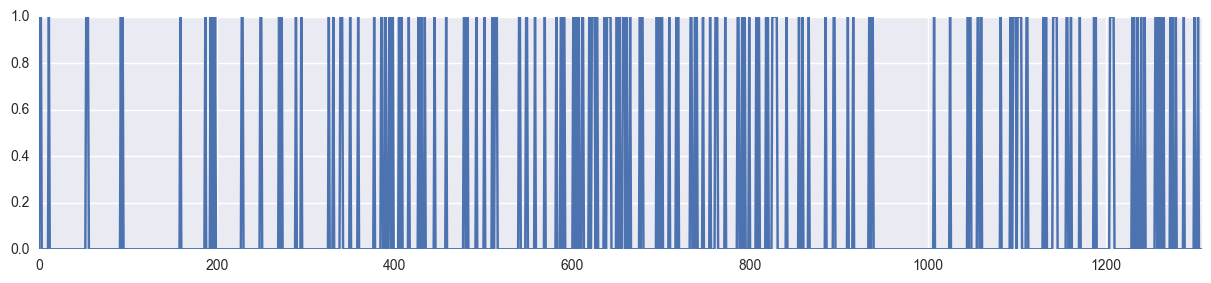

In [5]:
is_young.plot()

## Replacing Values in Pandas

In [6]:
raw_data = {'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'],
            'last_name': [
                'Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze'
            ],
            'age': [42, 52, 36, 24, 73],
            'preTestScore': [-999, -999, -999, 2, 1],
            'postTestScore': [2, 2, -999, 2, -999]}
df = pd.DataFrame(raw_data, 
                  columns = [
                    'first_name', 'last_name', 
                    'age', 'preTestScore', 'postTestScore'
                  ])
df

,first_name,last_name,age,preTestScore,postTestScore
0,Jason,Miller,42,-999,2
1,Molly,Jacobson,52,-999,2
2,Tina,Ali,36,-999,-999
3,Jake,Milner,24,2,2
4,Amy,Cooze,73,1,-999


In [7]:
df.replace(-999, np.nan)

,first_name,last_name,age,preTestScore,postTestScore
0,Jason,Miller,42,NaN,2.0
1,Molly,Jacobson,52,NaN,2.0
2,Tina,Ali,36,NaN,NaN
3,Jake,Milner,24,2.0,2.0
4,Amy,Cooze,73,1.0,NaN


In [15]:
df.postTestScore.mean(skipna=True)

-398.4

In [17]:
df.mean()

age                45.4
year             2013.0
reports            12.8
preTestScore     -598.8
postTestScore    -398.4
dtype: float64

In [ ]:
df = (df
      .replace(-999, np.nan)
      .replace('Jason', 'Trogdor the Burninator')
     )
df

![](http://i3.kym-cdn.com/photos/images/newsfeed/000/029/992/trogdor.png)

## Using a List Comprehension with Pandas

In [16]:
raw_data = {'first_name': ['Trogdor the Burninator', 
                           'Molly', 'Tina', 'Jake', 'Amy'],
            'last_name': [
                'Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze'
            ],
            'age': [42, 52, 36, 24, 73],
            'year': [2012, 2012, 2013, 2014, 2014], 
            'reports': [4, 24, 31, 2, 3],
            'preTestScore': [-999, -999, -999, 2, 1],
            'postTestScore': [2, 2, -999, 2, -999]}
df = pd.DataFrame(raw_data, 
                  columns = [
                    'first_name', 'last_name', 
                    'age', 'year', 'reports',
                    'preTestScore', 'postTestScore'
                  ],
                 index=['Cochice', 'Pima', 'Santa Cruz', 
                        'Maricopa', 'Yuma'])
df

,first_name,last_name,age,year,reports,preTestScore,postTestScore
Cochice,Trogdor the Burninator,Miller,42,2012,4,-999,2
Pima,Molly,Jacobson,52,2012,24,-999,2
Santa Cruz,Tina,Ali,36,2013,31,-999,-999
Maricopa,Jake,Milner,24,2014,2,2,2
Yuma,Amy,Cooze,73,2014,3,1,-999


In [18]:
df.drop(['preTestScore', 'postTestScore'], inplace=True, axis=1)
df

,first_name,last_name,age,year,reports
Cochice,Trogdor the Burninator,Miller,42,2012,4
Pima,Molly,Jacobson,52,2012,24
Santa Cruz,Tina,Ali,36,2013,31
Maricopa,Jake,Milner,24,2014,2
Yuma,Amy,Cooze,73,2014,3


### Looping through a Column

In [19]:
next_year = []

for row in df['year']:
    next_year.append(row + 1)

df['next_year'] = next_year

df

,first_name,last_name,age,year,reports,next_year
Cochice,Trogdor the Burninator,Miller,42,2012,4,2013
Pima,Molly,Jacobson,52,2012,24,2013
Santa Cruz,Tina,Ali,36,2013,31,2014
Maricopa,Jake,Milner,24,2014,2,2015
Yuma,Amy,Cooze,73,2014,3,2015


In [20]:
df['previous_year'] = [row-1 for row in df['year']]
df

,first_name,last_name,age,year,reports,next_year,previous_year
Cochice,Trogdor the Burninator,Miller,42,2012,4,2013,2011
Pima,Molly,Jacobson,52,2012,24,2013,2011
Santa Cruz,Tina,Ali,36,2013,31,2014,2012
Maricopa,Jake,Milner,24,2014,2,2015,2013
Yuma,Amy,Cooze,73,2014,3,2015,2013


In [21]:
df.last_name = df.last_name.replace('Milner', 'Miller')

## List Unique Values in a Pandas Column

In [22]:
df.last_name.unique()

array(['Miller', 'Jacobson', 'Ali', 'Cooze'], dtype=object)

In [23]:
df.last_name = df.last_name.astype('category')

In [24]:
df.last_name.unique()

[Miller, Jacobson, Ali, Cooze]
Categories (4, object): [Miller, Jacobson, Ali, Cooze]

## Make New Columns Using Functions

In [25]:
raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'], 
            'company': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'], 
            'name': ['Miller', 'Jacobson', 'Ali', 'Miller', 'Cooze', 'Jacon', 'Ryaner', 'Sone', 'Sloan', 'Piger', 'Riani', 'Ali'], 
            'preTestScore': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
            'postTestScore': [25, 94, 57, 62, 70, 25, 94, 57, 62, 70, 62, 70]}
df = pd.DataFrame(raw_data, columns = ['regiment', 'company', 'name', 'preTestScore', 'postTestScore'])
df

,regiment,company,name,preTestScore,postTestScore
0,Nighthawks,1st,Miller,4,25
1,Nighthawks,1st,Jacobson,24,94
2,Nighthawks,2nd,Ali,31,57
3,Nighthawks,2nd,Miller,2,62
4,Dragoons,1st,Cooze,3,70
5,Dragoons,1st,Jacon,4,25
6,Dragoons,2nd,Ryaner,24,94
7,Dragoons,2nd,Sone,31,57
8,Scouts,1st,Sloan,2,62
9,Scouts,1st,Piger,3,70


### Create a New Column as a Linear Combination of two Columns

In [26]:
df['score_change'] = df['postTestScore'] - df['preTestScore']
df

,regiment,company,name,preTestScore,postTestScore,score_change
0,Nighthawks,1st,Miller,4,25,21
1,Nighthawks,1st,Jacobson,24,94,70
2,Nighthawks,2nd,Ali,31,57,26
3,Nighthawks,2nd,Miller,2,62,60
4,Dragoons,1st,Cooze,3,70,67
5,Dragoons,1st,Jacon,4,25,21
6,Dragoons,2nd,Ryaner,24,94,70
7,Dragoons,2nd,Sone,31,57,26
8,Scouts,1st,Sloan,2,62,60
9,Scouts,1st,Piger,3,70,67


In [29]:
df['weighted_scores'] = .8*df['postTestScore'] + df['preTestScore'].mean
df

TypeError: unsupported operand type(s) for +: 'float' and 'instancemethod'

In [30]:
df['weighted_scores'] = .8*df['postTestScore'] + .2*df['preTestScore']
df

,regiment,company,name,preTestScore,postTestScore,score_change,weighted_scores
0,Nighthawks,1st,Miller,4,25,21,20.8
1,Nighthawks,1st,Jacobson,24,94,70,80.0
2,Nighthawks,2nd,Ali,31,57,26,51.8
3,Nighthawks,2nd,Miller,2,62,60,50.0
4,Dragoons,1st,Cooze,3,70,67,56.6
5,Dragoons,1st,Jacon,4,25,21,20.8
6,Dragoons,2nd,Ryaner,24,94,70,80.0
7,Dragoons,2nd,Sone,31,57,26,51.8
8,Scouts,1st,Sloan,2,62,60,50.0
9,Scouts,1st,Piger,3,70,67,56.6


In [31]:
df['squared_difference'] = df['postTestScore']**2 - df['preTestScore']**2
df

,regiment,company,name,preTestScore,postTestScore,score_change,weighted_scores,squared_difference
0,Nighthawks,1st,Miller,4,25,21,20.8,609
1,Nighthawks,1st,Jacobson,24,94,70,80.0,8260
2,Nighthawks,2nd,Ali,31,57,26,51.8,2288
3,Nighthawks,2nd,Miller,2,62,60,50.0,3840
4,Dragoons,1st,Cooze,3,70,67,56.6,4891
5,Dragoons,1st,Jacon,4,25,21,20.8,609
6,Dragoons,2nd,Ryaner,24,94,70,80.0,8260
7,Dragoons,2nd,Sone,31,57,26,51.8,2288
8,Scouts,1st,Sloan,2,62,60,50.0,3840
9,Scouts,1st,Piger,3,70,67,56.6,4891


In [32]:
df['scaled_squared_difference'] = (df['squared_difference']
                                   .apply(np.sqrt))
df

,regiment,company,name,preTestScore,postTestScore,score_change,weighted_scores,squared_difference,scaled_squared_difference
0,Nighthawks,1st,Miller,4,25,21,20.8,609,24.677925
1,Nighthawks,1st,Jacobson,24,94,70,80.0,8260,90.884542
2,Nighthawks,2nd,Ali,31,57,26,51.8,2288,47.833043
3,Nighthawks,2nd,Miller,2,62,60,50.0,3840,61.967734
4,Dragoons,1st,Cooze,3,70,67,56.6,4891,69.935685
5,Dragoons,1st,Jacon,4,25,21,20.8,609,24.677925
6,Dragoons,2nd,Ryaner,24,94,70,80.0,8260,90.884542
7,Dragoons,2nd,Sone,31,57,26,51.8,2288,47.833043
8,Scouts,1st,Sloan,2,62,60,50.0,3840,61.967734
9,Scouts,1st,Piger,3,70,67,56.6,4891,69.935685


## Missing Data In Pandas Dataframes

In [63]:
raw_data = {'first_name': ['Trogdor', 'Blake', 'Tina', 'Jake', 'Amy'],
        'last_name': ['Miller', np.nan, 'Ali', 'Miller', 'Cooze'],
        'age': [42, np.nan, 36, 24, 73],
        'sex': ['m', 'm', 'f', 'm', 'f'],
        'preTestScore': [4, np.nan, np.nan, 2, 3],
        'postTestScore': [25, np.nan, np.nan, 62, 70]}
df = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'sex', 'preTestScore', 'postTestScore'])
df

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Trogdor,Miller,42.0,m,4.0,25.0
1,Blake,NaN,NaN,m,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Miller,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


### Drop Missing Observations

In [ ]:
df.dropna()

### Drop Rows Containing Less Than Two Observations

In [56]:
df.dropna(thresh=2)

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Trogdor,Miller,42.0,m,4.0,25.0
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Miller,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


### Fill in missing data with zeros

In [57]:
df.fillna(0)

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Trogdor,Miller,42.0,m,4.0,25.0
1,Blake,0,0.0,0,0.0,0.0
2,Tina,Ali,36.0,f,0.0,0.0
3,Jake,Miller,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


### Fill in missing in preTestScore with the mean value of preTestScore

Note that we used `inplace=True` to make these changes permanent.

In [64]:
df["preTestScore"].fillna(df["preTestScore"].mean(), inplace=False)
df

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Trogdor,Miller,42.0,m,4.0,25.0
1,Blake,NaN,NaN,m,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Miller,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


### Fill in missing in postTestScore with each sex's mean value of postTestScore

In [65]:
(df["postTestScore"]
 .fillna(df.groupby("sex")["postTestScore"]
 .transform("mean"), inplace=True))
df

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Trogdor,Miller,42.0,m,4.0,25.0
1,Blake,NaN,NaN,m,NaN,43.5
2,Tina,Ali,36.0,f,NaN,70.0
3,Jake,Miller,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


## Breaking Up A String Into Columns Using Regex In Pandas

In [79]:
# Create a dataframe with a single column of strings
data = {'raw': ['Arizona  1 2014-12-23       32142.0',
                'Iowa     1 2010-02-23       3453.7',
                'Oregon   0 2014-06-20       213.0',
                'Maryland 0 2014-03-14       1123.6',
                'Florida  1 2013-01-15       2134.0',
                'Georgia  0 July 14, 2015    2345.6']}
df = pd.DataFrame(data, columns = ['raw'])
df

,raw
0,Arizona 1 2014-12-23 32142.0
1,Iowa 1 2010-02-23 3453.7
2,Oregon 0 2014-06-20 213.0
3,Maryland 0 2014-03-14 1123.6
4,Florida 1 2013-01-15 2134.0
5,"Georgia 0 July 14, 2015 2345.6"


In [70]:
# Which rows of df['raw'] contain 'xxxx-xx-xx'?
df['raw'].str.contains('....-..-..', regex=True)

0     True
1     True
2     True
3     True
4     True
5    False
Name: raw, dtype: bool

In [71]:
# In the column 'raw', extract single digit in the strings
df['female'] = df['raw'].str.extract('(\d)', expand=True)
df

,raw,female
0,Arizona 1 2014-12-23 32142.0,1
1,Iowa 1 2010-02-23 3453.7,1
2,Oregon 0 2014-06-20 213.0,0
3,Maryland 0 2014-03-14 1123.6,0
4,Florida 1 2013-01-15 2134.0,1
5,"Georgia 0 July 14, 2015 2345.6",0


In [72]:
# In the column 'raw', extract ####.## in the strings
df['score'] = df['raw'].str.extract('(\d+\.\d)', expand=True)
df

,raw,female,score
0,Arizona 1 2014-12-23 32142.0,1,32142.0
1,Iowa 1 2010-02-23 3453.7,1,3453.7
2,Oregon 0 2014-06-20 213.0,0,213.0
3,Maryland 0 2014-03-14 1123.6,0,1123.6
4,Florida 1 2013-01-15 2134.0,1,2134.0
5,"Georgia 0 July 14, 2015 2345.6",0,2345.6


In [73]:
df['state'] = df['raw'].str.extract('([A-z]+? )', expand=True)
df

,raw,female,score,state
0,Arizona 1 2014-12-23 32142.0,1,32142.0,Arizona
1,Iowa 1 2010-02-23 3453.7,1,3453.7,Iowa
2,Oregon 0 2014-06-20 213.0,0,213.0,Oregon
3,Maryland 0 2014-03-14 1123.6,0,1123.6,Maryland
4,Florida 1 2013-01-15 2134.0,1,2134.0,Florida
5,"Georgia 0 July 14, 2015 2345.6",0,2345.6,Georgia


In [80]:
df['raw'] = df['raw'].str.replace('July (\d+?), (\d\d\d\d)', '\\2-07-\\1')
df

,raw
0,Arizona 1 2014-12-23 32142.0
1,Iowa 1 2010-02-23 3453.7
2,Oregon 0 2014-06-20 213.0
3,Maryland 0 2014-03-14 1123.6
4,Florida 1 2013-01-15 2134.0
5,Georgia 0 2015-07-14 2345.6


In [ ]:
df['date'] = df['raw'].str.extract('(....-..-..)', expand=True)
df

In [ ]:
df.drop('raw', inplace=True, axis=1)
df